In [1]:
#!/usr/bin/python
# coding=utf-8
# 采用TF-IDF方法提取文本关键词
# http://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting
import sys,codecs
import pandas as pd
import numpy as np
import jieba.posseg
import jieba.analyse
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

##### 1. 词性筛选

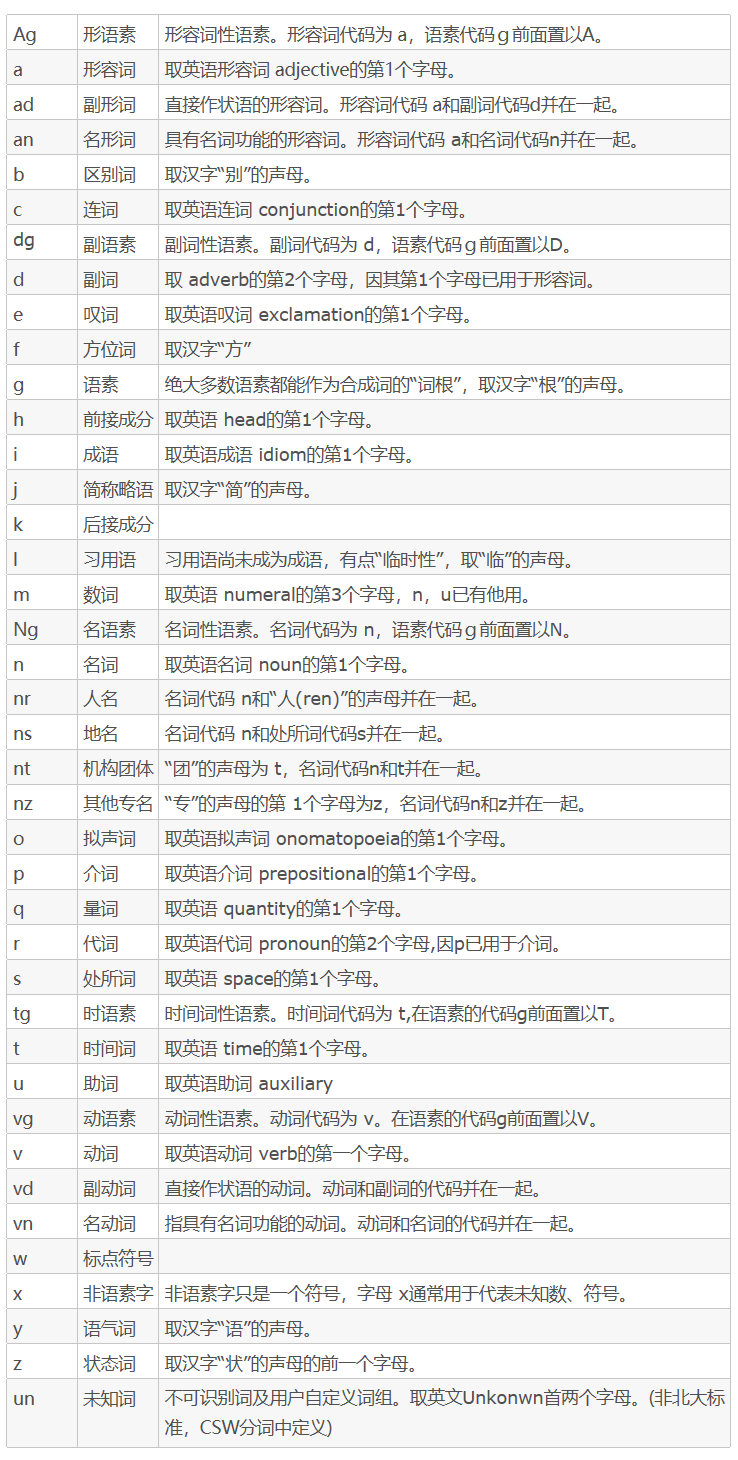

In [2]:
def dataPrepos(text):
    l = []
    pos = ['n', 'nz', 'v', 'vd', 'vn', 'l', 'a', 'd']  # 定义选取的词性
    seg = jieba.posseg.cut(text)  # 分词
    for i in seg:
        if i.word and i.flag in pos:  # 词性筛选
            l.append(i.word)
    return l

In [3]:
string = '本发明公开了一种支撑结构，其配置用于在车辆的乘客车厢内定位仪表板。'

In [8]:
segs = jieba.posseg.cut(string)

In [11]:
for seg in segs:
    print('word: {}, pos: {}'.format(seg.word,seg.flag))

word: 了, pos: ul
word: 一种, pos: m
word: 支撑, pos: v
word: 结构, pos: n
word: ，, pos: x
word: 其, pos: r
word: 配置, pos: v
word: 用于, pos: v
word: 在, pos: p
word: 车辆, pos: n
word: 的, pos: uj
word: 乘客, pos: n
word: 车厢, pos: n
word: 内, pos: n
word: 定位, pos: n
word: 仪表板, pos: n
word: 。, pos: x


In [3]:
# tf-idf获取文本top10关键词
def getKeywords_tfidf(data,topK):
    idList, titleList, abstractList = data['id'], data['title'], data['abstract']
    corpus = [] # 将所有文档输出到一个list中，一行就是一个文档
    
    for index in range(len(idList)):
        text = '%s。%s' % (titleList[index], abstractList[index]) # 拼接标题和摘要
        text = dataPrepos(text) # 文本预处理
        text = " ".join(text) # 连接成字符串，空格分隔
        corpus.append(text)

    # 1、构建词频矩阵，将文本中的词语转换成词频矩阵
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus) # 词频矩阵,a[i][j]:表示j词在第i个文本中的词频
    # 2、统计每个词的tf-idf权值
    transformer = TfidfTransformer()
    tfidf = transformer.fit_transform(X)
    # 3、获取词袋模型中的关键词
    word = vectorizer.get_feature_names()
    # 4、获取tf-idf矩阵，a[i][j]表示j词在i篇文本中的tf-idf权重
    weight = tfidf.toarray()
    # 5、打印词语权重
    ids, titles, keys = [], [], []
    for i in range(len(weight)):
        print(u"-------这里输出第", i+1 , u"篇文本的词语tf-idf------")
        ids.append(idList[i])
        titles.append(titleList[i])
        df_word,df_weight = [],[] # 当前文章的所有词汇列表、词汇对应权重列表
        for j in range(len(word)):
            print (word[j],weight[i][j])
    
    return corpus

In [4]:
dataFile = r'data/sample_data.csv'

In [5]:
data = pd.read_csv(dataFile)

In [6]:
data.head()

,id,title,abstract
0,1,永磁电机驱动的纯电动大巴车坡道起步防溜策略,本发明公开了一种永磁电机驱动的纯电动大巴车坡道起步防溜策略，即本策略当制动踏板已踩下、永磁电...
1,2,机动车辆车门的肘靠,一种溃缩结构是作为内部支撑件而被提供在机动车辆的车门衬板上的肘靠中，所述溃缩结构具有多个以交...
2,3,仪表板支撑结构,本发明公开了一种支撑结构，其配置用于在车辆的乘客车厢内定位仪表板。所述支撑结构包括支撑支架和...
3,4,铰接的头枕总成,一种车辆座椅总成，包括座椅靠背、头枕和支承结构，支承结构在头枕和座椅靠背之间延伸。支承结构包...
4,5,用于评估和控制电池系统的系统和方法,本发明涉及用于评估和控制电池系统的系统和方法。介绍了用于估计电池系统中的各独立电池分部的相对...
